# MIRI MRS Channel and slice plotting notebook

Author: Jonathan Aguilar (jaguilar@stsci.edu)

This notebook visualizes source placement for MRS observations, for a given orientation of the telescope. It shows the footprint of individual MRS slices within a given channel. For a more general introduction to WHIPPOT, see [WHIPPOT_tutorial](WHIPPOT_tutorial).

This notebook was originally designed for observations that use target acquisition on one star and then manually command the slew to another. Generally, users planning without TA or with self-TA should use the same coordinates for their ACQ target as for their SCI target. 

The user provides the RA and Dec coordinates for the target acquisition (ACQ) star and science (SCI) star, and a telescope roll angle. These tools will then compute a) the "Special Requirement Offset" X and Y values needed to place the SCI star at the reference position, and b) the final coordinates of the SCI and ACQ stars. Coordinates are given in IDL (https://jwst-docs.stsci.edu/jwst-observatory-hardware/jwst-target-observability-and-observatory-coordinate-system/jwst-instrument-ideal-coordinate-systems#gsc.tab=0).

The user can also provide a list of extra targets in the field in the format specified below, and their IDL coordinates will also be computed. As such, this notebook is useful not just for planning target acquisition, but also for predicting to high precision the final positions of astronomical bodies in the field of view.

## Setup ##

  1. Navigate in a terminal to the directory where you have downloaded the module. This should contain the `setup.py` file.
  2. Activate your desired python environment.
  3. Run `pip install .` (or `pip install -e.` for developing)
  4. Copy this notebook to your working directory, and run your jupyter kernel in the appropriate environment.

In [1]:
# for development purposes
%load_ext autoreload
%autoreload 2

In [2]:
# for your system, choose an appropriate plotting backend to make pop-up window plots
# (currently, inline plots show up in the log but not directly in the notebook).
# %matplotlib throws an error if you run it first, so do inline first.
%matplotlib inline
%matplotlib osx

In [3]:
from whippot import whippot_tools
# if the library is not installed replace the line above with the line below 
# when `whippot_tools.py` is in the same folder as the notebook
# import whippot_tools

**WARNING**: LOCAL JWST PRD VERSION PRDOPSSOC-068 DOESN'T MATCH THE CURRENT ONLINE VERSION PRDOPSSOC-071
Please consider updating pysiaf, e.g. pip install --upgrade pysiaf or conda update pysiaf


## An example of a real field

The source coordinates below are taken from a real commissioning activity, where we needed to check that the traces wouldn't overlap.

In [4]:
# some 
sources = {
    'SCI': whippot_tools.SkyCoord("05 24 20.7552 -70 05 1.60", frame='icrs', unit=("hourangle","degree")),
    'a': whippot_tools.SkyCoord("05 24 20.6552 -70 05 1.60", frame='icrs', unit=("hourangle","degree")),
}

In [5]:
from astropy import units
initial_values={
    'instr': 'miri',
    'sci_aper': 'mirifu_channel1b', 
    'pa': 290.,
    'sci_ra': sources['SCI'].ra.deg, 'sci_dec': sources['SCI'].dec.deg,
    'exclude_roi': True
}
# add a multi-line string of the other stars, copied from the cell above
initial_values['other_stars'] = "\n".join(f"{k}: ({v.ra.deg}, {v.dec.deg})" for k, v in sources.items() if k not in ['SCI'])

## Use the MRS-specific ComputePositions class

The ComputePositions class in `miri_mrs_tools.py` is a subclass of the general `ComputePositions` class that adds LRS-specific overlays to the plots.

In [6]:
from whippot.modes import miri_mrs_tools
cp1 = miri_mrs_tools.ComputePositions(initial_values=initial_values)
cp1.ui

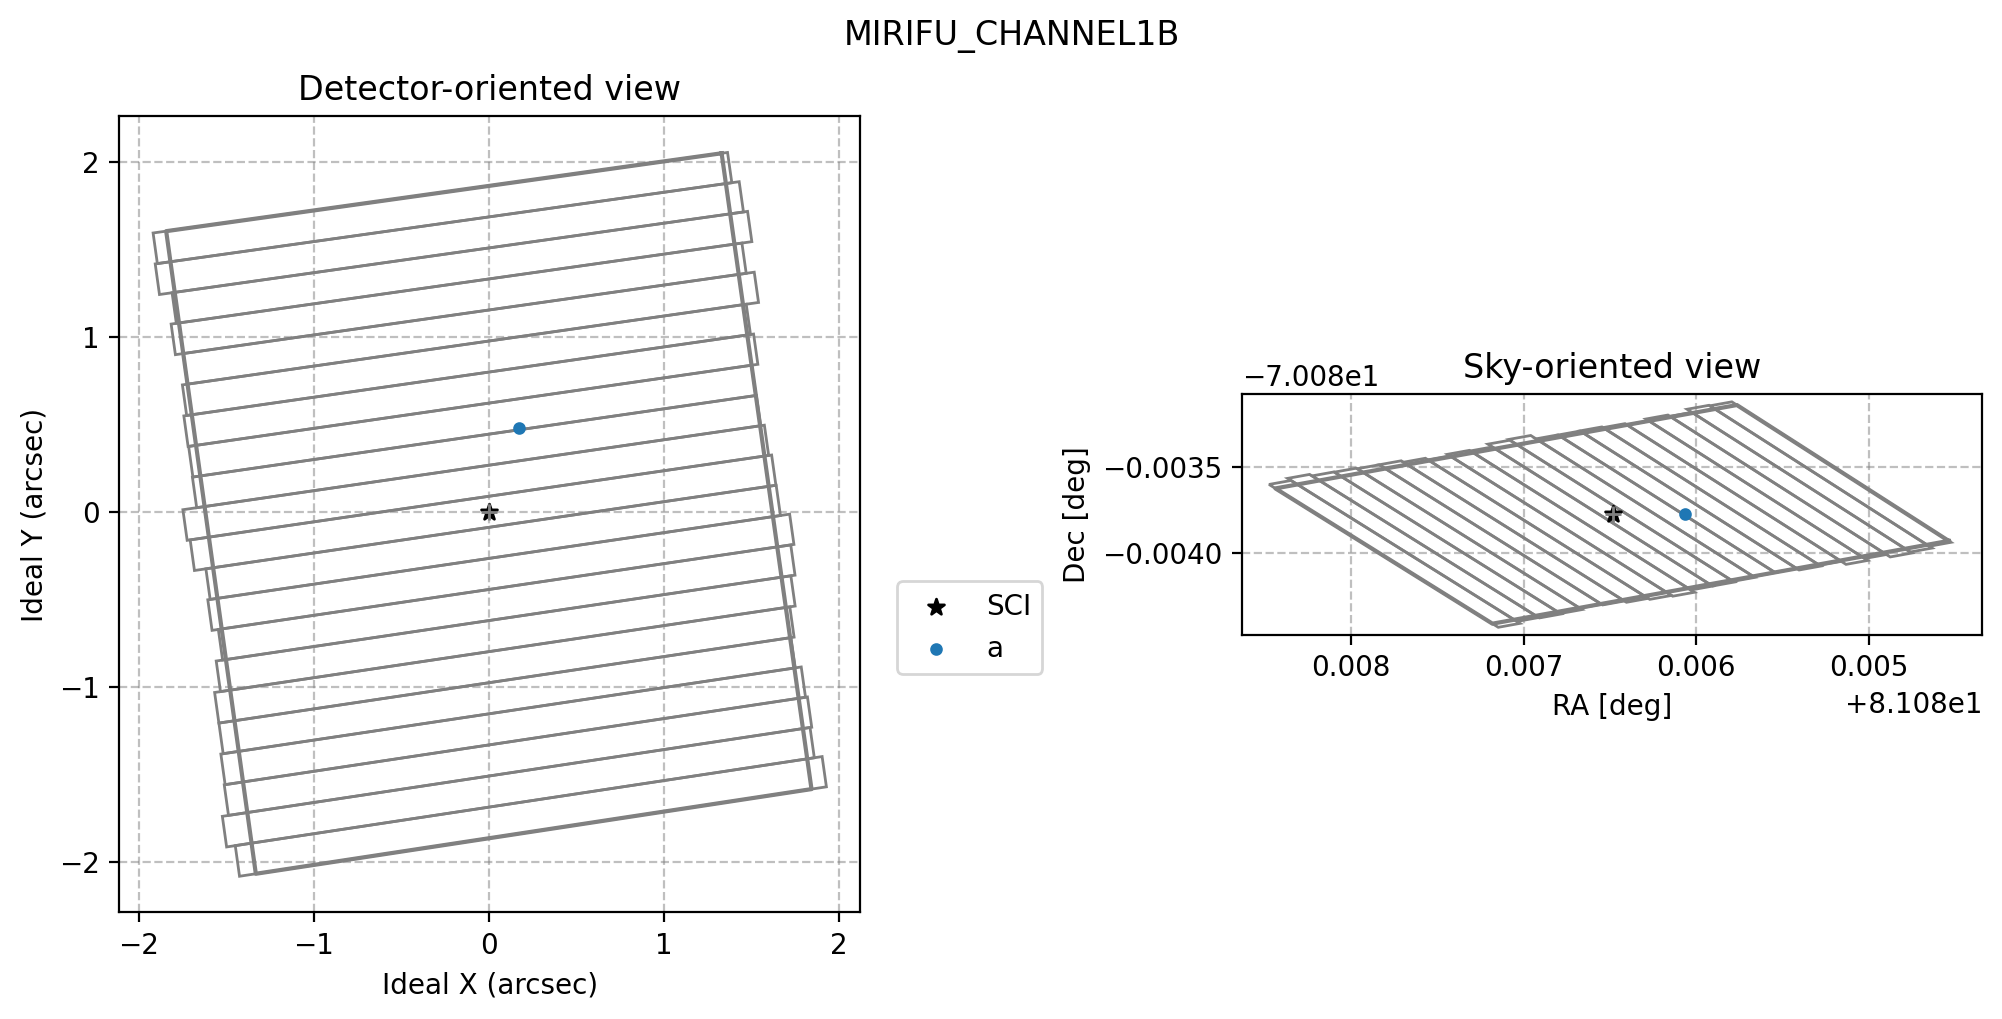

In [7]:
cp1.plot_scene()